In [1]:
!pip install apyori

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5973 sha256=8b0fc991b828d2623d17e53516bf6fc31c2541d5187c3fca32d4f824b3cb4d4a
  Stored in directory: /root/.cache/pip/wheels/1b/02/6c/a45230be8603bd95c0a51cd2b289aefdd860c1a100eab73661
Successfully built apyori


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from apyori import apriori

In [3]:
titanic = pd.read_csv("/content/titanic_train.csv")

In [4]:
#data exploration
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Initial exploration shows that there are a total of 891 values and 12 columns, there are missing values in Age, Cabin and Embarked.

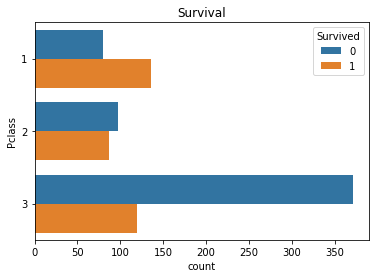

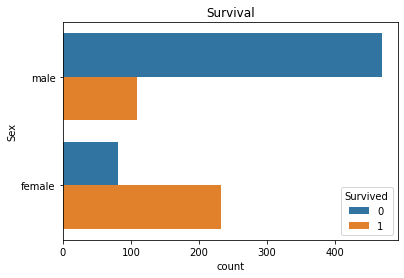

In [13]:
#visualzing the data
for x in ['Pclass', 'Sex']:
  grp = sns.countplot(y=x, hue="Survived", data=titanic)
  plt.ylabel(x)
  plt.title('Survival')
  plt.show()

From the countplot, I observed that there are more female survivals than there are males in regardless of Passenger class. 

In [16]:
#Setting up the association rules
association_rules = apriori(titanic, min_support=0.01, min_confidence=0.7, min_lift=3, min_length=2)

In [18]:
#Converting the associations to list
rules = list(association_rules)

In [19]:
#Printing the numbers
print(len(rules))

873


In [20]:
number = 1
for rule in rules:
    pair = rule[0] 
    items = [x for x in pair]
    
    print("Rule #{}".format(number) + "\n")
    print("Antecedent: {} => Consequent: {}".format(items[0], items[1]) + "\n")
    print("Support: {}".format(str(rule[1])) + "\n")
    print("Confidence: {}".format(str(rule[2][0][2])) + "\n")
    print("Lift: {}".format(str(rule[2][0][3])) + "\n")
    print("====================================================="+"\n")
    
    print("Rule #{}".format(number))
    print("Antecedent: {} => Consequent: {}".format(items[0], items[1]))
    print("Support: {}".format(str(rule[1])))
    print("Confidence: {}".format(str(rule[2][0][2])))
    print("Lift: {}".format(str(rule[2][0][3])))
    print("=====================================================")
    number += 1

Streaming output truncated to the last 5000 lines.
Support: 0.08333333333333333

Confidence: 1.0

Lift: 4.0


Rule #596
Antecedent: d => Consequent: r
Support: 0.08333333333333333
Confidence: 1.0
Lift: 4.0
Rule #597

Antecedent: d => Consequent: s

Support: 0.08333333333333333

Confidence: 1.0

Lift: 12.0


Rule #597
Antecedent: d => Consequent: s
Support: 0.08333333333333333
Confidence: 1.0
Lift: 12.0
Rule #598

Antecedent: g => Consequent: d

Support: 0.08333333333333333

Confidence: 1.0

Lift: 12.0


Rule #598
Antecedent: g => Consequent: d
Support: 0.08333333333333333
Confidence: 1.0
Lift: 12.0
Rule #599

Antecedent: g => Consequent: d

Support: 0.08333333333333333

Confidence: 1.0

Lift: 12.0


Rule #599
Antecedent: g => Consequent: d
Support: 0.08333333333333333
Confidence: 1.0
Lift: 12.0
Rule #600

Antecedent: g => Consequent: d

Support: 0.08333333333333333

Confidence: 1.0

Lift: 12.0


Rule #600
Antecedent: g => Consequent: d
Support: 0.08333333333333333
Confidence: 1.0
Lift: